In [1]:
using Revise
using Pkg

ENV["PYTHON"] = Sys.which("python")
ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
Pkg.build("PyCall")
using FileIO
using JLD2
include("../src/DistributionallyRobust.jl")
using .DistributionallyRobust

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/915ebe6f0e7302693bdd8eac985797dba1d25662/build.log`


    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/62f417f6ad727987c755549e9cd88c46578da562/build.log`


┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/kh-ryu/DRC_Project/DRC_Trajectron/Manifest.toml:0


┌ Info: Number of Julia Thread(s): 1
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:39
┌ Info: CUDA Device: NVIDIA GeForce RTX 3060
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:40


┌ Info: Python executable used by PyCall: /home/kh-ryu/anaconda3/envs/trajectron++/bin/python
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:41


In [45]:
include("$(@__DIR__)/../scripts/default_params/params_drc_data_trajectron.jl");

epsilon = 0.05;
cem_init_num_samples = 2000;
cem_init_num_elites = 200;
cem_init_iterations = 5;
test_data_name = "hotel_test.pkl";  
ado_vel_dict = Dict("Any" => MvNormal([0.0, 0.0], Diagonal([0.4, 0.4])));  
start_time_idx = 401;   
sim_horizon = 10.0;
prediction_mode = "gaussian";    
dto = 0.4

include("$(@__DIR__)/../scripts/parameter_setup_drc.jl");

In [46]:
scene_loader, controller, w_init, measurement_schedule, target_trajectory, target_speed = 
controller_setup(scene_param,
                 predictor_param,
                 prediction_device=prediction_device,
                 cost_param=cost_param,
                 cnt_param=cnt_param,
                 dtc=dtc,
                 ado_vel_dict=ado_vel_dict,
                 ego_pos_init_vec=ego_pos_init_vec,
                 ego_pos_goal_vec=ego_pos_goal_vec,
                 target_speed=target_speed,
                 sim_horizon=sim_horizon,
                 verbose=false);

In [47]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec,
                  target_speed, measurement_schedule, target_trajectory,
                  pos_error_replan);

┌ Warning: Time 2.80 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 2.80 [sec]: DRC computation took 0.104 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.80 [sec]: This evaluation iteration took 0.105 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.90 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 2.90 [sec]: DRC computation took 0.106 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.90 [sec]: This evaluation iteration took 0.106 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.00 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 3.00 [sec]: DRC computation took 0.105 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.00 [sec]: This evaluation iteration took 0.105 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.10 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 3.10 [sec]: DRC computation took 0.107 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.10 [sec]: This evaluation iteration took 0.108 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.20 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 3.20 [sec]: DRC computation took 0.163 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.20 [sec]: This evaluation iteration took 0.164 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.30 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 3.30 [sec]: DRC computation took 0.127 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.30 [sec]: This evaluation iteration took 0.127 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.40 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 3.40 [sec]: DRC computation took 0.133 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.40 [sec]: This evaluation iteration took 0.133 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.50 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 3.50 [sec]: DRC computation took 0.128 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.50 [sec]: This evaluation iteration took 0.128 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.60 [sec]: DRC computation took 0.129 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.60 [sec]: This evaluation iteration took 0.13 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.70 [sec]: DRC computation took 0.135 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.70 [sec]: This evaluation iteration took 0.135 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.80 [sec]: DRC computation took 0.134 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.80 [sec]: This evaluation iteration took 0.134 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.90 [sec]: DRC computation took 0.128 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.90 [sec]: This evaluation iteration took 0.128 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.00 [sec]: DRC computation took 0.162 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.00 [sec]: This evaluation iteration took 0.162 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.10 [sec]: DRC computation took 0.153 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.10 [sec]: This evaluation iteration took 0.153 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.20 [sec]: DRC computation took 0.16 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.20 [sec]: This evaluation iteration took 0.16 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.30 [sec]: DRC computation took 0.165 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.30 [sec]: This evaluation iteration took 0.165 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.40 [sec]: DRC computation took 0.199 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.40 [sec]: This evaluation iteration took 0.2 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.50 [sec]: DRC computation took 0.193 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.50 [sec]: This evaluation iteration took 0.193 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.60 [sec]: DRC computation took 0.193 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.60 [sec]: This evaluation iteration took 0.193 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.70 [sec]: DRC computation took 0.196 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.70 [sec]: This evaluation iteration took 0.196 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.80 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 4.80 [sec]: DRC computation took 0.206 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.80 [sec]: This evaluation iteration took 0.207 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.90 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 4.90 [sec]: DRC computation took 0.233 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.90 [sec]: This evaluation iteration took 0.233 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.00 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 5.00 [sec]: DRC computation took 0.21 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.00 [sec]: This evaluation iteration took 0.21 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.10 [sec]: DRC computation took 0.217 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.10 [sec]: This evaluation iteration took 0.217 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.20 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 5.20 [sec]: DRC computation took 0.248 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.20 [sec]: This evaluation iteration took 0.249 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.30 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 5.30 [sec]: DRC computation took 0.249 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.30 [sec]: This evaluation iteration took 0.249 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.40 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 5.40 [sec]: DRC computation took 0.258 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.40 [sec]: This evaluation iteration took 0.258 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.50 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 5.50 [sec]: DRC computation took 0.253 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.50 [sec]: This evaluation iteration took 0.253 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.60 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 5.60 [sec]: DRC computation took 0.346 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.60 [sec]: This evaluation iteration took 0.347 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.70 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 5.70 [sec]: DRC computation took 0.335 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.70 [sec]: This evaluation iteration took 0.335 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.80 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 5.80 [sec]: DRC computation took 0.34 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.80 [sec]: This evaluation iteration took 0.34 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.90 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 5.90 [sec]: DRC computation took 0.34 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.90 [sec]: This evaluation iteration took 0.34 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.00 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.00 [sec]: DRC computation took 0.342 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.00 [sec]: This evaluation iteration took 0.344 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.10 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.10 [sec]: DRC computation took 0.328 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.10 [sec]: This evaluation iteration took 0.328 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.20 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.20 [sec]: DRC computation took 0.347 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.20 [sec]: This evaluation iteration took 0.347 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.30 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.30 [sec]: DRC computation took 0.346 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.30 [sec]: This evaluation iteration took 0.346 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.40 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.40 [sec]: DRC computation took 0.428 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.40 [sec]: This evaluation iteration took 0.43 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.50 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.50 [sec]: DRC computation took 0.397 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.50 [sec]: This evaluation iteration took 0.398 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.60 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.60 [sec]: DRC computation took 0.366 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.60 [sec]: This evaluation iteration took 0.366 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.70 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.70 [sec]: DRC computation took 0.37 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.70 [sec]: This evaluation iteration took 0.37 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.80 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.80 [sec]: DRC computation took 0.357 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.80 [sec]: This evaluation iteration took 0.358 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.90 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.90 [sec]: DRC computation took 0.396 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.90 [sec]: This evaluation iteration took 0.396 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.00 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 7.00 [sec]: DRC computation took 0.386 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.00 [sec]: This evaluation iteration took 0.386 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.10 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 7.10 [sec]: DRC computation took 0.36 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.10 [sec]: This evaluation iteration took 0.36 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.20 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 7.20 [sec]: DRC computation took 0.365 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.20 [sec]: This evaluation iteration took 0.366 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.30 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 7.30 [sec]: DRC computation took 0.403 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.30 [sec]: This evaluation iteration took 0.403 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.40 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 7.40 [sec]: DRC computation took 0.407 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.40 [sec]: This evaluation iteration took 0.407 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.50 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 7.50 [sec]: DRC computation took 0.418 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.50 [sec]: This evaluation iteration took 0.418 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.60 [sec]: DRC computation took 0.4 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.60 [sec]: This evaluation iteration took 0.401 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.70 [sec]: DRC computation took 0.429 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.70 [sec]: This evaluation iteration took 0.429 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.80 [sec]: DRC computation took 0.429 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.80 [sec]: This evaluation iteration took 0.429 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.90 [sec]: DRC computation took 0.441 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.90 [sec]: This evaluation iteration took 0.441 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.00 [sec]: DRC computation took 0.41 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.00 [sec]: This evaluation iteration took 0.411 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.10 [sec]: DRC computation took 0.398 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.10 [sec]: This evaluation iteration took 0.398 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.20 [sec]: DRC computation took 0.422 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.20 [sec]: This evaluation iteration took 0.422 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.30 [sec]: DRC computation took 0.386 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.30 [sec]: This evaluation iteration took 0.386 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.40 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 8.40 [sec]: DRC computation took 0.419 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.40 [sec]: This evaluation iteration took 0.42 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.50 [sec]: DRC computation took 0.382 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.50 [sec]: This evaluation iteration took 0.382 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.60 [sec]: DRC computation took 0.411 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.60 [sec]: This evaluation iteration took 0.411 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.70 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 8.70 [sec]: DRC computation took 0.41 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.70 [sec]: This evaluation iteration took 0.41 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.80 [sec]: DRC computation took 0.642 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.80 [sec]: This evaluation iteration took 0.643 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.90 [sec]: DRC computation took 0.572 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.90 [sec]: This evaluation iteration took 0.572 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.00 [sec]: DRC computation took 0.559 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.00 [sec]: This evaluation iteration took 0.559 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.10 [sec]: DRC computation took 0.583 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.10 [sec]: This evaluation iteration took 0.583 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.20 [sec]: DRC computation took 0.565 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.20 [sec]: This evaluation iteration took 0.567 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.30 [sec]: DRC computation took 0.671 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.30 [sec]: This evaluation iteration took 0.671 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.40 [sec]: DRC computation took 0.593 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.40 [sec]: This evaluation iteration took 0.593 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.50 [sec]: DRC computation took 0.709 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.50 [sec]: This evaluation iteration took 0.709 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.60 [sec]: DRC computation took 0.565 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.60 [sec]: This evaluation iteration took 0.566 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.70 [sec]: DRC computation took 0.657 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.70 [sec]: This evaluation iteration took 0.657 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.80 [sec]: DRC computation took 0.661 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.80 [sec]: This evaluation iteration took 0.662 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.90 [sec]: DRC computation took 0.67 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.90 [sec]: This evaluation iteration took 0.67 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


In [48]:
display_log(result.log)

Time 0.00 [sec]: New prediction is available to the controller.
Time 0.00 [sec]: New Distributionally Robust control is scheduled.
Time 0.00 [sec]: New Distributionally Robust control is available to the controller
Time 0.00 [sec]: control: [-2.0, 2.0] is applied to the system.
Time 0.10 [sec]: New Distributionally Robust control is scheduled.
Time 0.10 [sec]: New Distributionally Robust control is available to the controller
Time 0.10 [sec]: control: [-0.1633740304899299, 0.9737257739260474] is applied to the system.
Time 0.20 [sec]: New Distributionally Robust control is scheduled.
Time 0.20 [sec]: New Distributionally Robust control is available to the controller
Time 0.20 [sec]: control: [1.5020405396943286, 0.6899877657897533] is applied to the system.
Time 0.30 [sec]: New Distributionally Robust control is scheduled.
Time 0.30 [sec]: New Distributionally Robust control is available to the controller
Time 0.30 [sec]: control: [-1.0257505545141634, 1.8923206116618017] is applied to

Time 3.60 [sec]: New Distributionally Robust control is available to the controller
Time 3.60 [sec]: control: [0.03788702209626574, 1.5135794084059877] is applied to the system.
Time 3.70 [sec]: New Distributionally Robust control is scheduled.
Time 3.70 [sec]: New Distributionally Robust control is available to the controller
Time 3.70 [sec]: control: [-0.3338080217421008, -0.09687460704787035] is applied to the system.
Time 3.80 [sec]: New Distributionally Robust control is scheduled.
Time 3.80 [sec]: New Distributionally Robust control is available to the controller
Time 3.80 [sec]: control: [-0.19562957075717705, -0.36691328923669525] is applied to the system.
Time 3.90 [sec]: New Distributionally Robust control is scheduled.
Time 3.90 [sec]: New Distributionally Robust control is available to the controller
Time 3.90 [sec]: control: [-2.0, -0.7564833951821478] is applied to the system.
Time 4.00 [sec]: New measurement is obtained.
Time 4.00 [sec]: New prediction is scheduled.
Time

Time 7.30 [sec]: New Distributionally Robust control is scheduled.
Time 7.30 [sec]: New Distributionally Robust control is available to the controller
Time 7.30 [sec]: control: [-0.04331235669806954, -2.0] is applied to the system.
Time 7.40 [sec]: New Distributionally Robust control is scheduled.
Time 7.40 [sec]: New Distributionally Robust control is available to the controller
Time 7.40 [sec]: control: [1.5294910336955798, -1.2878109286826998] is applied to the system.
Time 7.50 [sec]: New Distributionally Robust control is scheduled.
Time 7.50 [sec]: New Distributionally Robust control is available to the controller
Time 7.50 [sec]: control: [0.1264461965979594, -1.1847121579327222] is applied to the system.
Time 7.60 [sec]: New measurement is obtained.
Time 7.60 [sec]: New prediction is scheduled.
Time 7.60 [sec]: New prediction is available to the controller.
Time 7.60 [sec]: New Distributionally Robust control is scheduled.
Time 7.60 [sec]: New Distributionally Robust control is

In [49]:
result.total_cnt_cost

1.3104532973760759

In [50]:
result.total_pos_cost

254.2232694315382

In [51]:
result.total_col_cost

3.029375454974824

In [52]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

258.5630981838891

In [53]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

0.9632713868513585

Progress:   2%|▊                                        |  ETA: 0:00:23

Progress:   3%|█▎                                       |  ETA: 0:00:23

Progress:   4%|█▋                                       |  ETA: 0:00:22

Progress:   5%|██                                       |  ETA: 0:00:22

Progress:   6%|██▍                                      |  ETA: 0:00:22

Progress:   7%|██▉                                      |  ETA: 0:00:22

Progress:   8%|███▎                                     |  ETA: 0:00:22

Progress:   9%|███▋                                     |  ETA: 0:00:21

Progress:  10%|████                                     |  ETA: 0:00:21

Progress:  11%|████▌                                    |  ETA: 0:00:22

Progress:  12%|████▉                                    |  ETA: 0:00:22

Progress:  13%|█████▎                                   |  ETA: 0:00:22

Progress:  14%|█████▋                                   |  ETA: 0:00:22

Progress:  15%|██████▏                                  |  ETA: 0:00:22

Progress:  16%|██████▌                                  |  ETA: 0:00:22

Progress:  17%|██████▉                                  |  ETA: 0:00:22

Progress:  18%|███████▎                                 |  ETA: 0:00:22

Progress:  19%|███████▊                                 |  ETA: 0:00:22

Progress:  20%|████████▏                                |  ETA: 0:00:23

Progress:  21%|████████▌                                |  ETA: 0:00:23

Progress:  22%|████████▉                                |  ETA: 0:00:22

Progress:  23%|█████████▍                               |  ETA: 0:00:22

Progress:  24%|█████████▊                               |  ETA: 0:00:22

Progress:  25%|██████████▏                              |  ETA: 0:00:22

Progress:  26%|██████████▌                              |  ETA: 0:00:22

Progress:  27%|███████████                              |  ETA: 0:00:22

Progress:  28%|███████████▍                             |  ETA: 0:00:22

Progress:  29%|███████████▊                             |  ETA: 0:00:22

Progress:  30%|████████████▏                            |  ETA: 0:00:22

Progress:  31%|████████████▋                            |  ETA: 0:00:22

Progress:  32%|█████████████                            |  ETA: 0:00:22

Progress:  33%|█████████████▍                           |  ETA: 0:00:22

Progress:  34%|█████████████▊                           |  ETA: 0:00:22

Progress:  35%|██████████████▎                          |  ETA: 0:00:22

Progress:  36%|██████████████▋                          |  ETA: 0:00:22

Progress:  37%|███████████████                          |  ETA: 0:00:22

Progress:  38%|███████████████▍                         |  ETA: 0:00:22

Progress:  39%|███████████████▉                         |  ETA: 0:00:22

Progress:  40%|████████████████▎                        |  ETA: 0:00:23

Progress:  41%|████████████████▋                        |  ETA: 0:00:22

Progress:  42%|█████████████████                        |  ETA: 0:00:22

Progress:  43%|█████████████████▌                       |  ETA: 0:00:22

Progress:  44%|█████████████████▉                       |  ETA: 0:00:22

Progress:  45%|██████████████████▎                      |  ETA: 0:00:22

Progress:  46%|██████████████████▋                      |  ETA: 0:00:22

Progress:  47%|███████████████████▏                     |  ETA: 0:00:22

Progress:  48%|███████████████████▌                     |  ETA: 0:00:22

Progress:  49%|███████████████████▉                     |  ETA: 0:00:22

Progress:  50%|████████████████████▎                    |  ETA: 0:00:21

Progress:  50%|████████████████████▊                    |  ETA: 0:00:21

Progress:  51%|█████████████████████▏                   |  ETA: 0:00:21

Progress:  52%|█████████████████████▌                   |  ETA: 0:00:21

Progress:  53%|█████████████████████▉                   |  ETA: 0:00:21

Progress:  54%|██████████████████████▍                  |  ETA: 0:00:20

Progress:  55%|██████████████████████▊                  |  ETA: 0:00:20

Progress:  56%|███████████████████████▏                 |  ETA: 0:00:20

Progress:  57%|███████████████████████▌                 |  ETA: 0:00:20

Progress:  58%|████████████████████████                 |  ETA: 0:00:20

Progress:  59%|████████████████████████▍                |  ETA: 0:00:19

Progress:  60%|████████████████████████▊                |  ETA: 0:00:19

Progress:  61%|█████████████████████████▏               |  ETA: 0:00:19

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:19

Progress:  63%|██████████████████████████               |  ETA: 0:00:18

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:18

Progress:  65%|██████████████████████████▊              |  ETA: 0:00:18

Progress:  66%|███████████████████████████▎             |  ETA: 0:00:17

Progress:  67%|███████████████████████████▋             |  ETA: 0:00:17

Progress:  68%|████████████████████████████             |  ETA: 0:00:17

Progress:  69%|████████████████████████████▍            |  ETA: 0:00:16

Progress:  70%|████████████████████████████▉            |  ETA: 0:00:16

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:16

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:15

Progress:  73%|██████████████████████████████           |  ETA: 0:00:15

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:14

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:14

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:14

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:13

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:13

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:12

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:12

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:11

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:11

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:10

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:10

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:09

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:09

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:08

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:08

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:07

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:06

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:06

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:05

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:05

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:04

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:03

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:03

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


┌ Info: Saved animation to 
│   fn = /home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/drc_synthetic_gaussian.gif
└ @ Plots /home/kh-ryu/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/drc_synthetic_gaussian.gif")
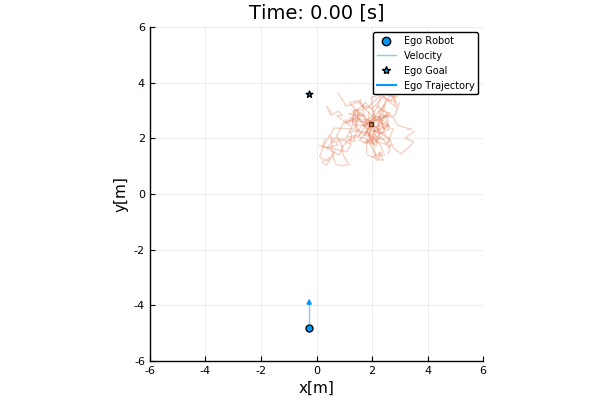

In [54]:
make_gif(result, dtplot=0.1, fps=5, xlim=(-6., 6.), ylim=(-6., 6.), figsize=(600, 400), 
         legendfontsize=7, legend=:topright, markersize=5., filename="drc_synthetic_gaussian.gif",
         show_nominal_trajectory=false)

In [55]:
save("drc_synthetic_gaussian.jld2", "result", result)

Error encountered while save File{DataFormat{:JLD2}, String}("drc_synthetic_gaussian.jld2").

Fatal error:


CapturedException: type DataType has no field mutable
Stacktrace:
  [1] getproperty
    @ ./Base.jl:33 [inlined]
  [2] hasfielddata(T::Any, encounteredtypes::Vector{DataType})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:24
  [3] hasdata(T::DataType, encounteredtypes::Vector{DataType})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:32
  [4] hasdata
    @ ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:30 [inlined]
  [5] odr(#unused#::Type{Main.DistributionallyRobust.DRCEvaluationResult})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:563
  [6] objodr
    @ ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:109 [inlined]
  [7] write_dataset
    @ ~/.julia/packages/JLD2/qncOK/src/datasets.jl:541 [inlined]
  [8] write(g::JLD2.Group{JLD2.JLDFile{JLD2.MmapIO}}, name::String, obj::Main.DistributionallyRobust.DRCEvaluationResult, wsession::JLD2.JLDWriteSession{Dict{UInt64, JLD2.RelOffset}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/groups.jl:119
  [9] write(f::JLD2.JLDFile{JLD2.MmapIO}, name::String, obj::Main.DistributionallyRobust.DRCEvaluationResult, wsession::JLD2.JLDWriteSession{Dict{UInt64, JLD2.RelOffset}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/JLD2.jl:347
 [10] (::JLD2.var"#62#63"{String, Main.DistributionallyRobust.DRCEvaluationResult, Tuple{}})(file::JLD2.JLDFile{JLD2.MmapIO})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:23
 [11] jldopen(::JLD2.var"#62#63"{String, Main.DistributionallyRobust.DRCEvaluationResult, Tuple{}}, ::String, ::Vararg{String}; kws::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/loadsave.jl:4
 [12] jldopen(::Function, ::String, ::String)
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/loadsave.jl:1
 [13] save(::File{DataFormat{:JLD2}, String}, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:21
 [14] save(::File{DataFormat{:JLD2}, String}, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:17
 [15] invokelatest(::Any, ::Any, ::Vararg{Any}; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ Base ./essentials.jl:729
 [16] invokelatest(::Any, ::Any, ::Vararg{Any})
    @ Base ./essentials.jl:726
 [17] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Formatted, ::String, ::Vararg{Any}; options::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:219
 [18] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Formatted, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:196
 [19] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Symbol, ::String, ::String, ::Vararg{Any}; options::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:185
 [20] action
    @ ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:185 [inlined]
 [21] #save#20
    @ ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:129 [inlined]
 [22] save(::String, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:125
 [23] top-level scope
    @ ~/DRC_Project/DRC_Trajectron/notebook/Eval_Example_10_DRC_Synthetic_Gaussian.ipynb:1